In [2]:
%load_ext autoreload
%autoreload 2

import json
from pathlib import Path
import pandas as pd
from krxns.network import construct_reaction_network, SuperMultiDiGraph
from hydra import compose, initialize
from ergochemics.draw import draw_reaction, draw_molecule
from ergochemics.standardize import standardize_smiles
from IPython.display import SVG
import networkx as nx
from itertools import product
from functools import partial
from tqdm import tqdm

with initialize(version_base=None, config_path="../configs/filepaths"):
    cfg = compose("filepaths")

In [3]:
kcs = pd.read_csv(Path(cfg.interim_data) / "compounds.csv")
sources = pd.read_csv(Path(cfg.interim_data) / "default_sources.csv")
sources = sources['id'].tolist()
with open(Path(cfg.interim_data) / "mass_contributions.json", 'r') as f:
    mass_contributions = json.load(f)

edges, nodes = construct_reaction_network(
    mass_contributions=mass_contributions,
    compounds=kcs,
    sources=sources,
)


In [4]:
len(edges), len(nodes)

(20326, 6171)

In [5]:
G = SuperMultiDiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [6]:
def show_path(source, target, topk = 1):
    node_path, edge_path = G.shortest_path(source, target)
    print(node_path)
    for i, step in enumerate(edge_path):
        print(f"STEP #{i+1}")
        for edge in step[:topk]:
            print([(k, v) for k, v in edge.items()])
            display(SVG(draw_reaction(edge["am_smarts"])))

In [7]:
G.get_nodes_by_prop('name', 'pyruvate')[0]

1561

[1561, 6202, 6161, 6215]
STEP #1
[('reaction_id', 1535), ('pdt_normed_mass_frac', 0.6666666666666666), ('rct_normed_mass_frac', 1.0), ('am_smarts', '[CH3:3][C:4](=[O:5])[C:6](=[O:7])[OH:8].[NH2:17][C:16](=[O:18])[C:10]1=[CH:15][N:14]([CH:19]2[O:20][CH:22]([CH2:25][O:27][P:28](=[O:29])([OH:30])[O:31][P:32](=[O:33])([OH:34])[O:35][CH2:36][CH:37]3[O:38][CH:40]([n:43]4[cH:45][n:47][c:49]5[c:51]([NH2:53])[n:52][cH:50][n:48][c:46]54)[CH:41]([OH:44])[CH:39]3[OH:42])[CH:23]([OH:26])[CH:21]2[OH:24])[CH:13]=[CH:12][CH2:11]1.[O:2]=[C:1]=[O:9]>>[O:9]=[C:1]([OH:2])[CH2:3][CH:4]([OH:5])[C:6](=[O:7])[OH:8].[NH2:17][C:16](=[O:18])[c:10]1[cH:11][cH:12][cH:13][n+:14]([CH:19]2[O:20][CH:22]([CH2:25][O:27][P:28](=[O:29])([OH:30])[O:31][P:32](=[O:33])([OH:34])[O:35][CH2:36][CH:37]3[O:38][CH:40]([n:43]4[cH:45][n:47][c:49]5[c:51]([NH2:53])[n:52][cH:50][n:48][c:46]54)[CH:41]([OH:44])[CH:39]3[OH:42])[CH:23]([OH:26])[CH:21]2[OH:24])[cH:15]1'), ('coreactants', {5389, 6453}), ('coproducts', {5431})]


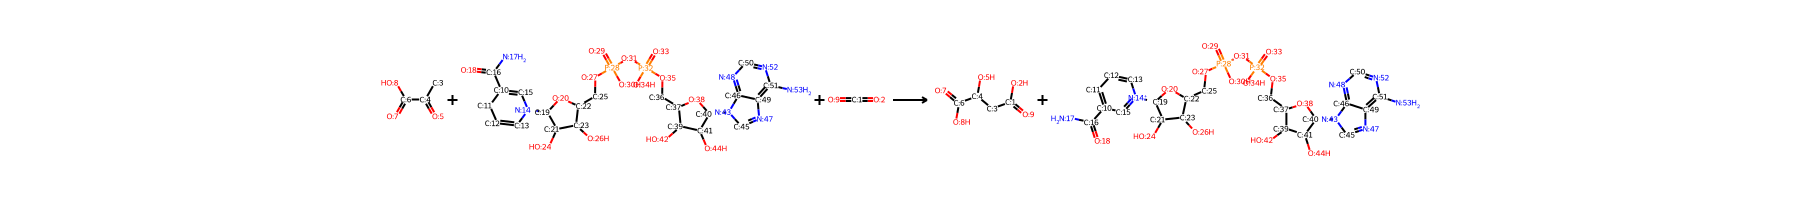

STEP #2
[('reaction_id', 2112), ('pdt_normed_mass_frac', 1.0), ('rct_normed_mass_frac', 0.8888888888888888), ('am_smarts', '[O:4]=[C:3]([OH:5])[CH2:2][CH:1]([OH:9])[C:6](=[O:7])[OH:8]>>[O:4]=[C:3]([OH:5])[CH:2]=[CH:1][C:6](=[O:7])[OH:8].[OH2:9]'), ('coreactants', set()), ('coproducts', {5946})]


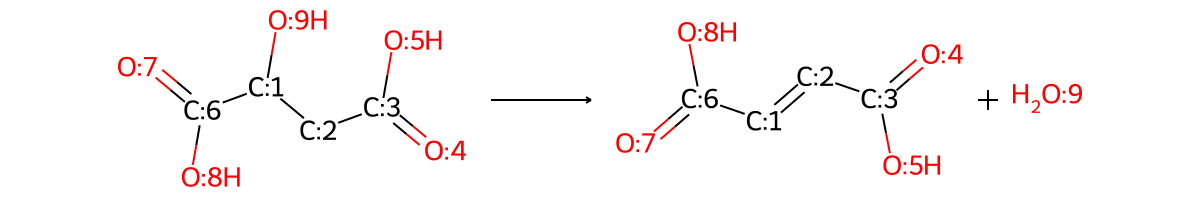

STEP #3
[('reaction_id', 12057), ('pdt_normed_mass_frac', 1.0), ('rct_normed_mass_frac', 1.0), ('am_smarts', '[NH2:16][C:15](=[O:17])[C:9]1=[CH:14][N:13]([CH:18]2[O:19][CH:21]([CH2:24][O:26][P:27](=[O:28])([OH:29])[O:30][P:31](=[O:32])([OH:33])[O:34][CH2:35][CH:36]3[O:37][CH:39]([n:42]4[cH:44][n:46][c:48]5[c:50]([NH2:52])[n:51][cH:49][n:47][c:45]54)[CH:40]([OH:43])[CH:38]3[OH:41])[CH:22]([OH:25])[CH:20]2[OH:23])[CH:12]=[CH:11][CH2:10]1.[O:4]=[C:3]([OH:5])[CH:1]=[CH:2][C:6](=[O:7])[OH:8]>>[O:4]=[C:3]([OH:5])[CH2:1][CH2:2][C:6](=[O:7])[OH:8].[NH2:16][C:15](=[O:17])[c:9]1[cH:10][cH:11][cH:12][n+:13]([CH:18]2[O:19][CH:21]([CH2:24][O:26][P:27](=[O:28])([OH:29])[O:30][P:31](=[O:32])([OH:33])[O:34][CH2:35][CH:36]3[O:37][CH:39]([n:42]4[cH:44][n:46][c:48]5[c:50]([NH2:52])[n:51][cH:49][n:47][c:45]54)[CH:40]([OH:43])[CH:38]3[OH:41])[CH:22]([OH:25])[CH:20]2[OH:23])[cH:14]1'), ('coreactants', {5389}), ('coproducts', {5431})]


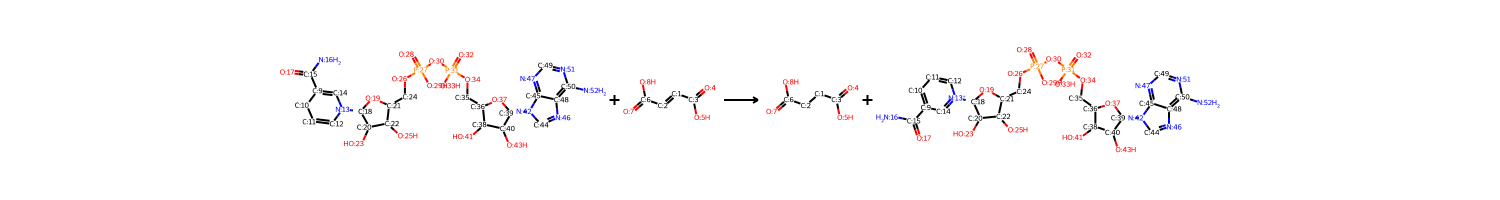

In [8]:
i = G.get_nodes_by_prop('name', 'pyruvate')[0]
j  = G.get_nodes_by_prop('name', 'succinate')[0]
show_path(i, j)

[6215, 1794, 2978, 1561]
STEP #1
[('reaction_id', 11956), ('pdt_normed_mass_frac', 0.25), ('rct_normed_mass_frac', 0.125), ('am_smarts', '[CH3:58][C:56](=[O:59])[S:2][CH2:3][CH2:4][NH:5][C:6](=[O:7])[CH2:8][CH2:9][NH:10][C:11](=[O:12])[CH:13]([OH:14])[C:15]([CH3:16])([CH3:17])[CH2:18][O:19][P:20](=[O:21])([OH:22])[O:23][P:24](=[O:25])([OH:26])[O:27][CH2:28][CH:29]1[O:30][CH:32]([n:35]2[cH:38][n:43][c:45]3[c:47]([NH2:49])[n:48][cH:46][n:44][c:39]32)[CH:33]([OH:36])[CH:31]1[O:34][P:37](=[O:40])([OH:41])[OH:42].[O:50]=[C:1]([OH:57])[CH2:51][CH2:52][C:53](=[O:54])[OH:55]>>[CH3:16][C:15]([CH3:17])([CH2:18][O:19][P:20](=[O:21])([OH:22])[O:23][P:24](=[O:25])([OH:26])[O:27][CH2:28][CH:29]1[O:30][CH:32]([n:35]2[cH:38][n:43][c:45]3[c:47]([NH2:49])[n:48][cH:46][n:44][c:39]32)[CH:33]([OH:36])[CH:31]1[O:34][P:37](=[O:40])([OH:41])[OH:42])[CH:13]([OH:14])[C:11](=[O:12])[NH:10][CH2:9][CH2:8][C:6](=[O:7])[NH:5][CH2:4][CH2:3][S:2][C:1](=[O:50])[CH2:51][CH2:52][C:53](=[O:54])[OH:55].[CH3:58][C:56](=[O:5

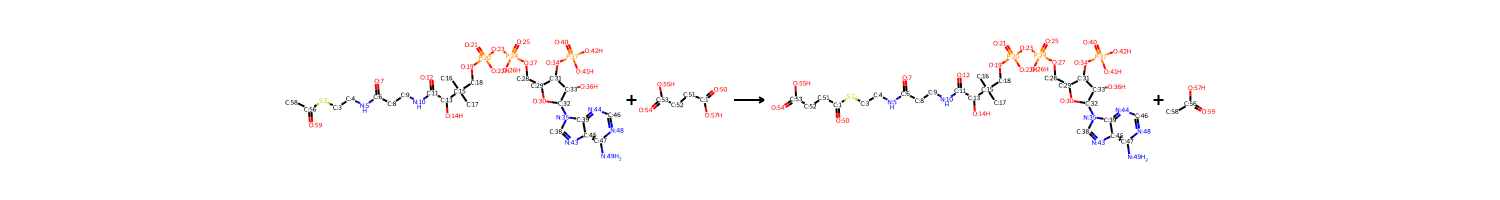

STEP #2
[('reaction_id', 16069), ('pdt_normed_mass_frac', 1.0), ('rct_normed_mass_frac', 0.75), ('am_smarts', '[CH3:3][C:1](=[O:2])[OH:4].[NH2:12][C:11](=[O:13])[C:5]1=[CH:10][N:9]([CH:14]2[O:15][CH:17]([CH2:20][O:22][P:23](=[O:24])([OH:25])[O:26][P:27](=[O:28])([OH:29])[O:30][CH2:31][CH:32]3[O:33][CH:35]([n:38]4[cH:40][n:43][c:45]5[c:50]([NH2:52])[n:51][cH:49][n:44][c:41]54)[CH:36]([O:39][P:42](=[O:46])([OH:47])[OH:48])[CH:34]3[OH:37])[CH:18]([OH:21])[CH:16]2[OH:19])[CH:8]=[CH:7][CH2:6]1>>[CH3:3][CH:1]=[O:2].[OH2:4].[NH2:12][C:11](=[O:13])[c:5]1[cH:6][cH:7][cH:8][n+:9]([CH:14]2[O:15][CH:17]([CH2:20][O:22][P:23](=[O:24])([OH:25])[O:26][P:27](=[O:28])([OH:29])[O:30][CH2:31][CH:32]3[O:33][CH:35]([n:38]4[cH:40][n:43][c:45]5[c:50]([NH2:52])[n:51][cH:49][n:44][c:41]54)[CH:36]([O:39][P:42](=[O:46])([OH:47])[OH:48])[CH:34]3[OH:37])[CH:18]([OH:21])[CH:16]2[OH:19])[cH:10]1'), ('coreactants', {5392}), ('coproducts', {5432, 5946})]


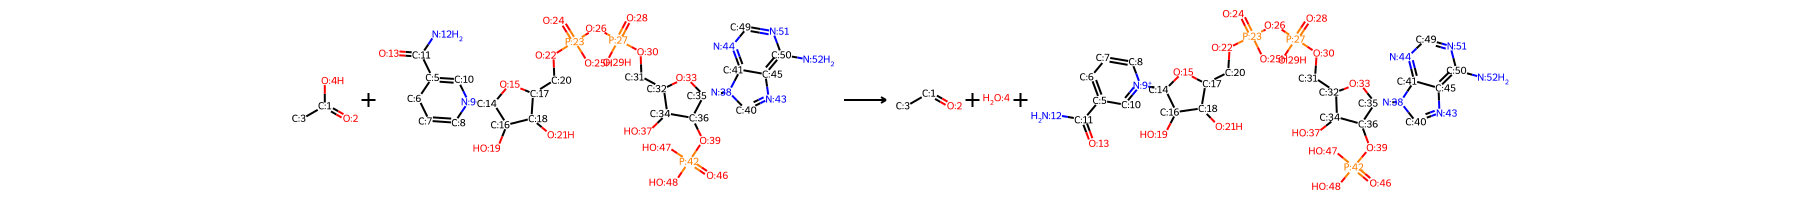

STEP #3
[('reaction_id', 3609), ('pdt_normed_mass_frac', 0.5), ('rct_normed_mass_frac', 1.0), ('am_smarts', '[CH3:5][CH:1]=[O:2].[O:4]=[C:3]=[O:6]>>[CH3:5][C:1](=[O:2])[C:3](=[O:6])[OH:4]'), ('coreactants', {6453}), ('coproducts', set())]


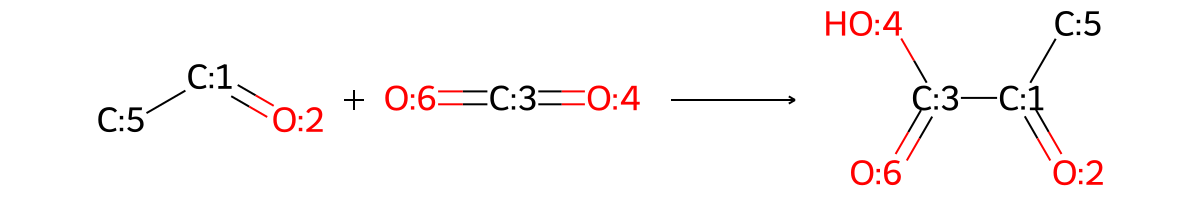

In [9]:
show_path(j, i)

[3291, 3300]
STEP #1
[('reaction_id', 410), ('pdt_normed_mass_frac', 0.09433962264150944), ('rct_normed_mass_frac', 0.8333333333333334), ('am_smarts', '[CH3:6][CH2:5][CH2:4][C:1](=[O:2])[OH:54].[CH3:20][C:18]([CH3:21])([CH2:22][O:23][P:24](=[O:25])([OH:26])[O:27][P:28](=[O:29])([OH:30])[O:31][CH2:32][CH:33]1[O:34][CH:36]([n:39]2[cH:42][n:47][c:49]3[c:51]([NH2:53])[n:52][cH:50][n:48][c:43]32)[CH:37]([OH:40])[CH:35]1[O:38][P:41](=[O:44])([OH:45])[OH:46])[CH:16]([OH:19])[C:15](=[O:17])[NH:14][CH2:13][CH2:11][C:10](=[O:12])[NH:9][CH2:8][CH2:7][SH:3]>>[CH3:6][CH2:5][CH2:4][C:1](=[O:2])[S:3][CH2:7][CH2:8][NH:9][C:10](=[O:12])[CH2:11][CH2:13][NH:14][C:15](=[O:17])[CH:16]([OH:19])[C:18]([CH3:20])([CH3:21])[CH2:22][O:23][P:24](=[O:25])([OH:26])[O:27][P:28](=[O:29])([OH:30])[O:31][CH2:32][CH:33]1[O:34][CH:36]([n:39]2[cH:42][n:47][c:49]3[c:51]([NH2:53])[n:52][cH:50][n:48][c:43]32)[CH:37]([OH:40])[CH:35]1[O:38][P:41](=[O:44])([OH:45])[OH:46].[OH2:54]'), ('coreactants', {1896}), ('coproducts', {594

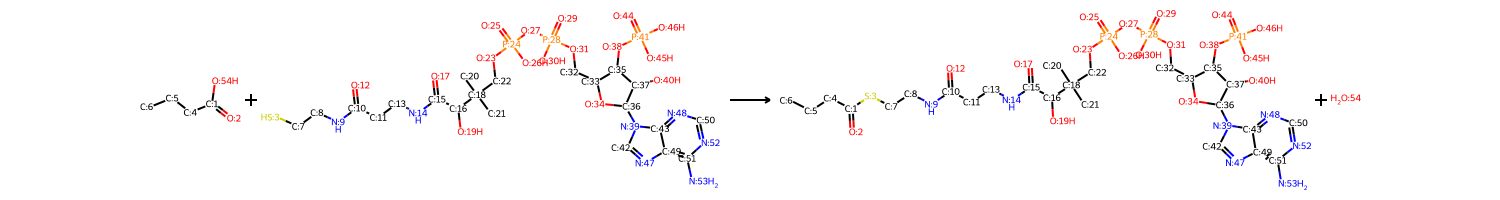

[3300, 3291]
STEP #1
[('reaction_id', 5109), ('pdt_normed_mass_frac', 0.8333333333333334), ('rct_normed_mass_frac', 0.09433962264150944), ('am_smarts', '[CH3:6][CH2:5][CH2:4][C:1](=[O:2])[S:7][CH2:8][CH2:9][NH:10][C:11](=[O:12])[CH2:13][CH2:14][NH:15][C:16](=[O:17])[CH:18]([OH:19])[C:20]([CH3:21])([CH3:22])[CH2:23][O:24][P:25](=[O:26])([OH:27])[O:28][P:29](=[O:30])([OH:31])[O:32][CH2:33][CH:34]1[O:35][CH:37]([n:40]2[cH:43][n:48][c:50]3[c:52]([NH2:54])[n:53][cH:51][n:49][c:44]32)[CH:38]([OH:41])[CH:36]1[O:39][P:42](=[O:45])([OH:46])[OH:47].[OH2:3]>>[CH3:6][CH2:5][CH2:4][C:1](=[O:2])[OH:3].[CH3:21][C:20]([CH3:22])([CH2:23][O:24][P:25](=[O:26])([OH:27])[O:28][P:29](=[O:30])([OH:31])[O:32][CH2:33][CH:34]1[O:35][CH:37]([n:40]2[cH:43][n:48][c:50]3[c:52]([NH2:54])[n:53][cH:51][n:49][c:44]32)[CH:38]([OH:41])[CH:36]1[O:39][P:42](=[O:45])([OH:46])[OH:47])[CH:18]([OH:19])[C:16](=[O:17])[NH:15][CH2:14][CH2:13][C:11](=[O:12])[NH:10][CH2:9][CH2:8][SH:7]'), ('coreactants', {5946}), ('coproducts', {18

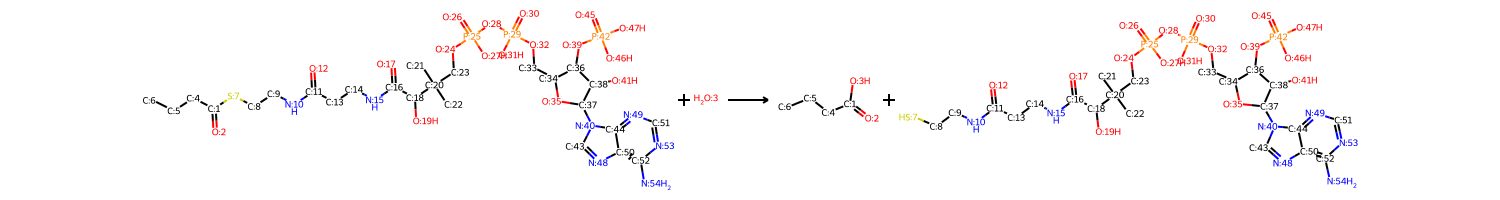

In [10]:
i = G.get_nodes_by_prop('name', 'butanoate')[0]
j  = G.get_nodes_by_prop('name', 'butanoyl-CoA')[0]
show_path(i, j)
show_path(j, i)

In [11]:
i = G.get_nodes_by_prop('names', ('pyruvate',))[0]
j  = G.get_nodes_by_prop('names', ('acetone',))[0]
show_path(i, j)

KeyError: 'names'

STEP #1
[('rid', 7031), ('rhea_ids', [55790]), ('imt_rules', ['rule0005_60']), ('atom_frac', 0.8), ('coreactants', {'NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)C=CC1': 1, 'O=O': 1}), ('coproducts', {'NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1': 1, 'O': 1})]


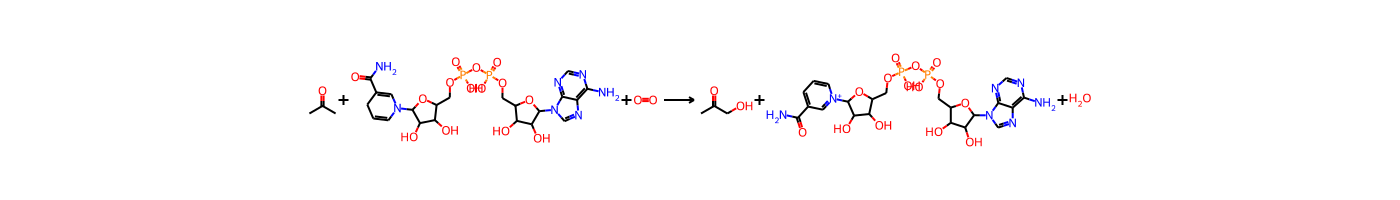

STEP #2
[('rid', 4467), ('rhea_ids', [27987]), ('imt_rules', ['rule0002_143']), ('atom_frac', 1.0), ('coreactants', {'NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1': 1}), ('coproducts', {'NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1': 1})]


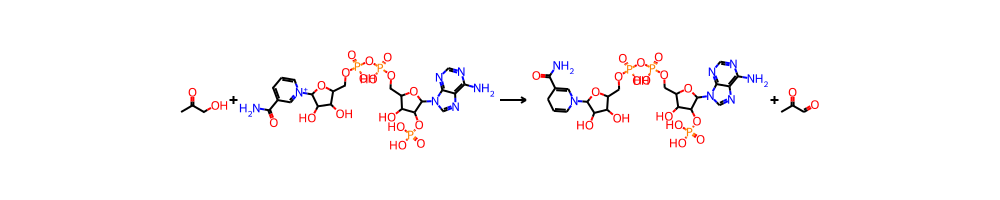

STEP #3
[('rid', 12191), ('rhea_ids', [49637]), ('imt_rules', ['rule0145_5']), ('atom_frac', 0.8333333333333334), ('coreactants', {'O': 1, 'O=O': 1}), ('coproducts', {'OO': 1})]


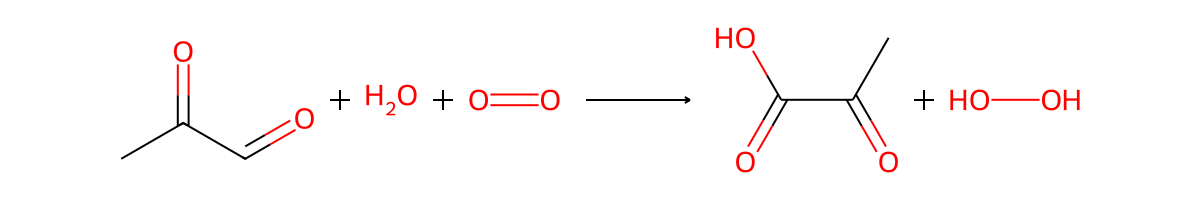

In [ ]:
show_path(j, i)

AMP
Nc1ncnc2c1ncn2C1OC(COP(=O)(O)O)C(O)C1O


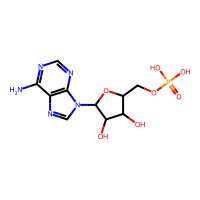

adenosine 2',5'-bisphosphate
Nc1ncnc2c1ncn2C1OC(COP(=O)(O)O)C(O)C1OP(=O)(O)O


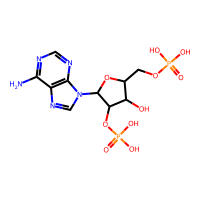

acetate
CC(=O)O


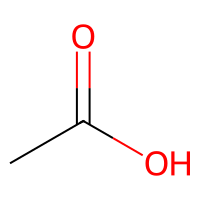

phosphate
O=P(O)(O)O


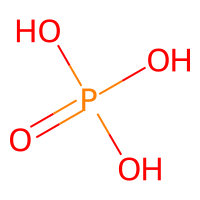

adenosine 3',5'-bisphosphate
Nc1ncnc2c1ncn2C1OC(COP(=O)(O)O)C(OP(=O)(O)O)C1O


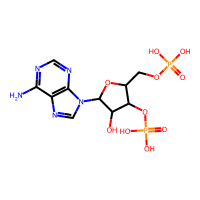

S-(5-deoxy-D-ribos-5-yl)-L-homocysteine
NC(CCSCC1OC(O)C(O)C1O)C(=O)O


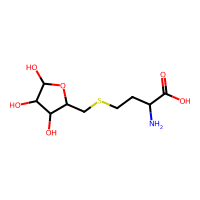

O2
O=O


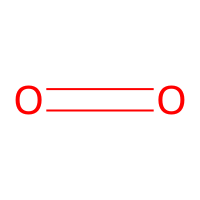

H2O2
OO


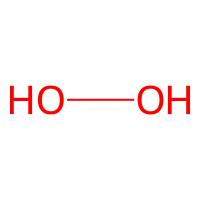

nan
NC(CCSCC1OC(n2cnc3c(=O)[nH]cnc32)C(O)C1O)C(=O)O


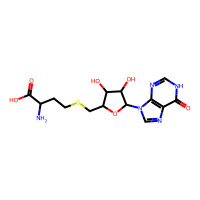

5-oxo-L-proline
O=C1CCC(C(=O)O)N1


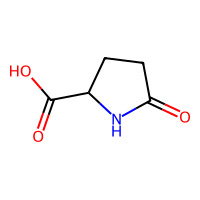

4-aminobutanoate
NCCCC(=O)O


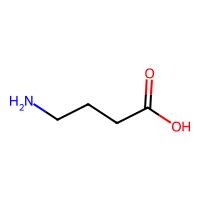

cis-homoaconitate
O=C(O)C=C(CCC(=O)O)C(=O)O


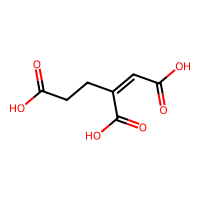

(6S)-NADHX;(6R)-NADHX
NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)C(O)CC1


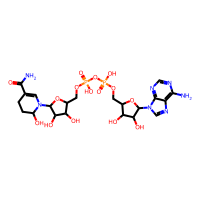

(6S)-NADPHX;(6R)-NADPHX
NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C(O)CC1


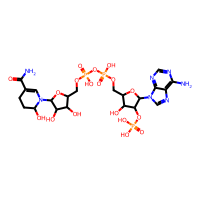

malonyl-CoA
CC(C)(COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)C(O)C(=O)NCCC(=O)NCCSC(=O)CC(=O)O


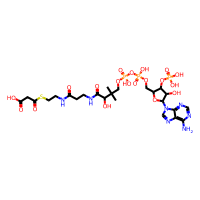

ADP
Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)O)C(O)C1O


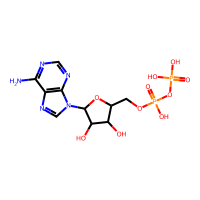

2-oxoglutaramate
NC(=O)CCC(=O)C(=O)O


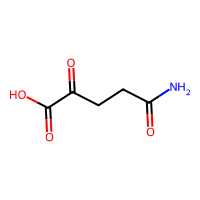

hydrogencarbonate
O=C(O)O


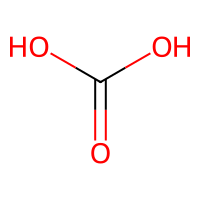

pyruvate
CC(=O)C(=O)O


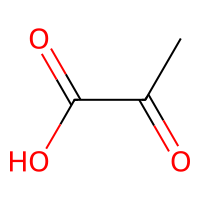

2-dehydro-3-deoxy-D-arabinonate;2-dehydro-3-deoxy-L-arabinonate
O=C(O)C(=O)CC(O)CO


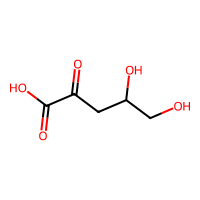

L-glutamine
NC(=O)CCC(N)C(=O)O


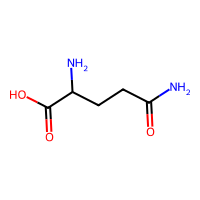

ADP-D-ribose
Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OCC2OC(O)C(O)C2O)C(O)C1O


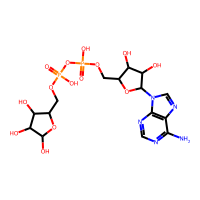

succinyl-CoA
CC(C)(COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)C(O)C(=O)NCCC(=O)NCCSC(=O)CCC(=O)O


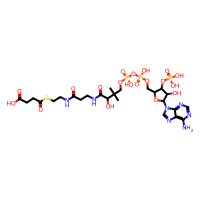

UMP
O=c1ccn(C2OC(COP(=O)(O)O)C(O)C2O)c(=O)[nH]1


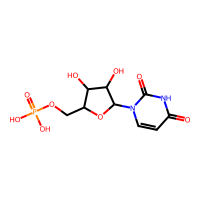

NH4(+)
N


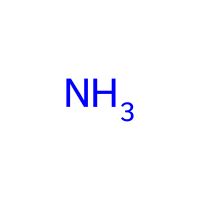

acetyl-CoA
CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O


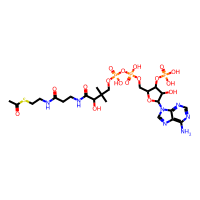

D-threo-isocitrate
O=C(O)CC(C(=O)O)C(O)C(=O)O


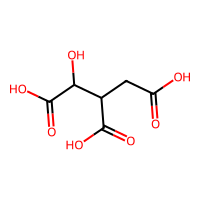

D-ribose 5-phosphate
O=P(O)(O)OCC1OC(O)C(O)C1O


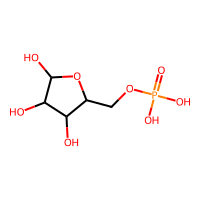

carbamate
NC(=O)O


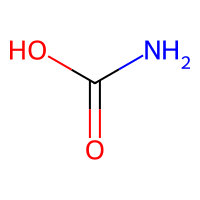

urea
NC(N)=O


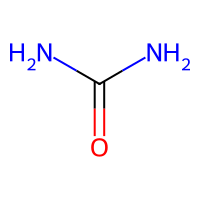

CO2
O=C=O


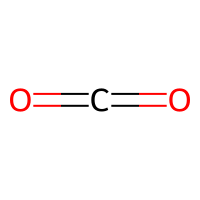

carbonyl sulfide
O=C=S


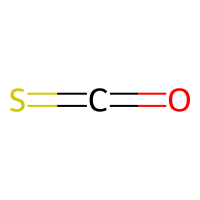

citrate
O=C(O)CC(O)(CC(=O)O)C(=O)O


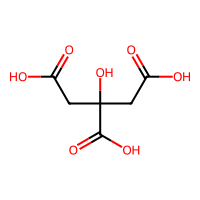

H2O
O


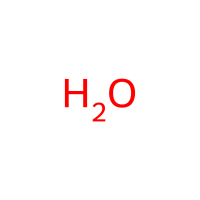

glyoxylate
O=CC(=O)O


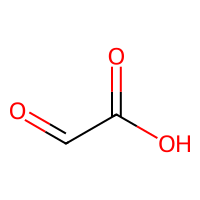

diphosphate
O=P(O)(O)OP(=O)(O)O


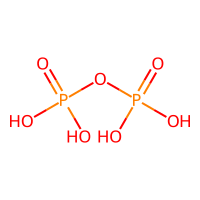

D-ribose 5-triphosphate
O=P(O)(O)OP(=O)(O)OP(=O)(O)OCC1OC(O)C(O)C1O


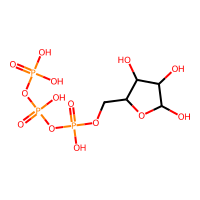

2-oxoglutarate
O=C(O)CCC(=O)C(=O)O


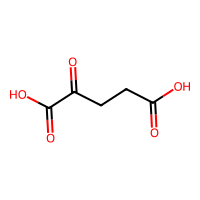

succinate
O=C(O)CCC(=O)O


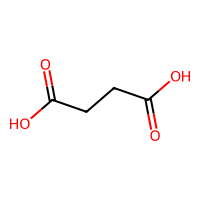

2,5-dioxopentanoate
O=CCCC(=O)C(=O)O


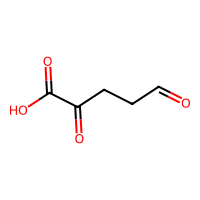

succinate semialdehyde
O=CCCC(=O)O


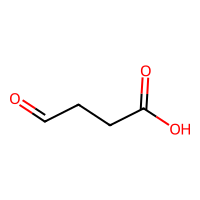

3-aminopentanedioate
NC(CC(=O)O)CC(=O)O


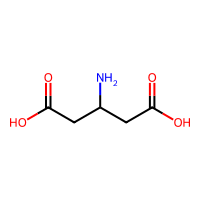

(2R)-homocitrate
O=C(O)CCC(O)(CC(=O)O)C(=O)O


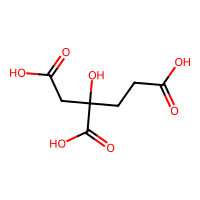

(S)-2-hydroxyglutarate
O=C(O)CCC(O)C(=O)O


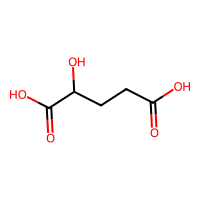

2-oxoadipate
O=C(O)CCCC(=O)C(=O)O


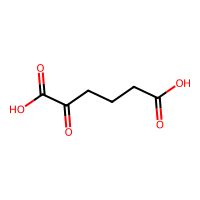

N-acetyl-L-glutamate
CC(=O)NC(CCC(=O)O)C(=O)O


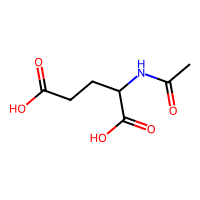

L-glutamate
NC(CCC(=O)O)C(=O)O


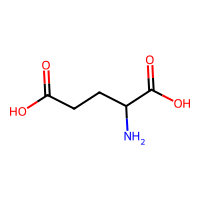

L-glutamyl 5-phosphate
NC(CCC(=O)OP(=O)(O)O)C(=O)O


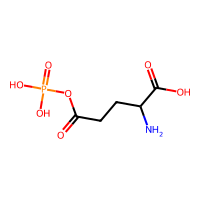

L-glutamate 5-semialdehyde
NC(CCC=O)C(=O)O


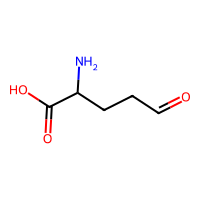

formate
O=CO


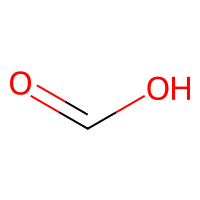

4-hydroxybutanoate
O=C(O)CCCO


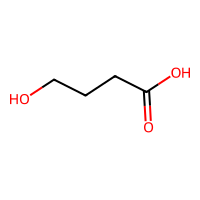

IMP
O=c1[nH]cnc2c1ncn2C1OC(COP(=O)(O)O)C(O)C1O


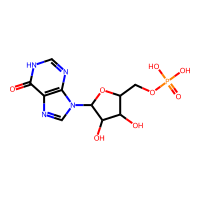

(S)-1-pyrroline-5-carboxylate
O=C(O)C1CCC=N1


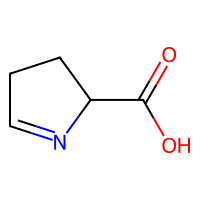

adenosine
Nc1ncnc2c1ncn2C1OC(CO)C(O)C1O


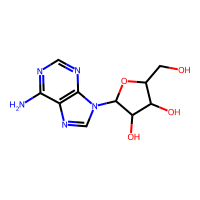

In [12]:
k = 2
id = G.get_nodes_by_prop('name', 'pyruvate')[0]
k_hop_neighbors = nx.ego_graph(G, 6210, radius=k)
for i in k_hop_neighbors:
    print(G.nodes[i]['name'])
    print(G.nodes[i]['smiles'])
    display(SVG(draw_molecule(G.nodes[i]['smiles'])))

In [12]:
for i in k_hop_neighbors:
    print(f"PATH TO {G.nodes[i]['name']}")
    show_path(id, i)

NameError: name 'k_hop_neighbors' is not defined